## Proyecto 1

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
def Logistic(t,x0,a,b):
    return b*x0/(x0+(b-x0)*np.exp(-a*t))
def error(xdat,xpred):
    xdat=np.array(xdat)
    xpred=np.array(xpred)
    err=(xdat-xpred)**2
    return err.sum()

In [32]:
df=pd.read_csv("PoblacionMexico.dat", delimiter="\t",header=None)
data=df[1]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19664\2510656608.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels.astype(int))


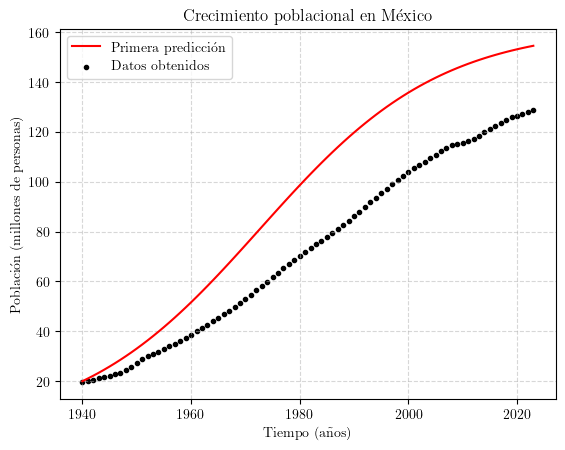

In [31]:
x0i=20
ai=0.06
bi=162
time=np.arange(data.size)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig,ax=plt.subplots()
guess1=Logistic(time,x0i,ai,bi)
plt.plot(time,guess1,color="red",label="Primera predicción")
plt.scatter(time,data, marker=".",color="black",label="Datos obtenidos")
labels=plt.xticks()[0]+1940
ax.set_xticklabels(labels.astype(int))
plt.grid(linestyle="--",alpha=0.5)
plt.xlabel("Tiempo (años)")
plt.ylabel("Población (millones de personas)")
plt.title("Crecimiento poblacional en México")
plt.legend()
plt.savefig("P1I1.pdf")

In [ ]:
x0i=20
ai=0.06
bi=162
time=np.arange(data.size)
fig,ax=plt.subplots()
guess1=Logistic(time,x0i,ai,bi)
plt.plot(time,guess1,color="red",label="Primera predicción")
plt.scatter(time,data, marker=".",color="black",label="Datos obtenidos")
plt.grid(linestyle="--",alpha=0.5)
plt.xlabel("Tiempo (años)")
plt.ylabel("Población (millones de personas)")
plt.title("Crecimiento poblacional en México")
plt.legend()
plt.savefig("P1I1.pdf")

In [9]:
n=10**6
sx=0.1
sa=0.001
sb=0.1
error_array=np.zeros(n)
success=0

In [10]:
x0=x0i
a=ai
b=bi
xinitial=guess1
for i in range(n):
    choice=np.random.choice(3)
    err0=error(xinitial,data)
    error_array[i]=err0
    if choice==0:
        delta_x = np.random.normal(0,sx)     
        new_x=Logistic(time,x0+delta_x,a,b)
        err1=error(new_x,data)
        if err0>err1:
            xinitial=new_x
            x0+=delta_x
            err0=err1
            success+=1
    if choice==1:
        delta_a = np.random.normal(0,sa)
        new_x=Logistic(time,x0,a+delta_a,b)
        err1=error(new_x,data)
        if err0>err1:
            xinitial=new_x
            a+=delta_a
            err0=err1
            success+=1
    if choice==2:
        delta_b = np.random.normal(0,sb)
        new_x=Logistic(time,x0,a,b+delta_b)
        err1=error(new_x,data)
        if err0>err1:
            xinitial=new_x
            b+=delta_b
            err0=err1
            success+=1

In [12]:
success,error_array[-1]

(1508, 34.28902099818884)

In [15]:
a1p=a
b1p=b
x01p=x0
a1p,b1p,x01p

(0.046036619933550633, 149.0594529382442, 18.3343414045961)

### Evolución del error

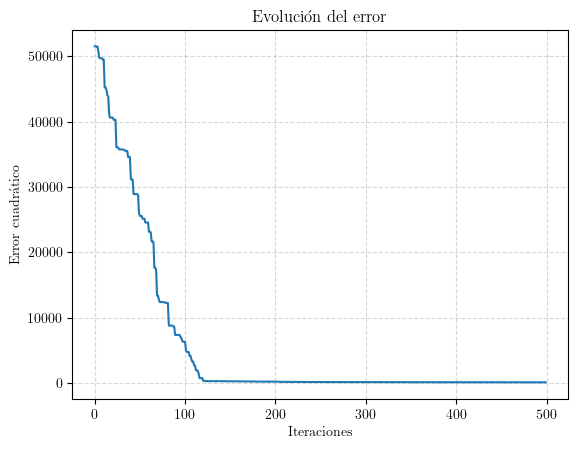

In [24]:
plt.plot(error_array[0:500])
plt.xlabel("Iteraciones")
plt.ylabel("Error cuadrático")
plt.title("Evolución del error")
plt.grid(linestyle="--",alpha=0.5)
plt.savefig("P1E1.pdf")

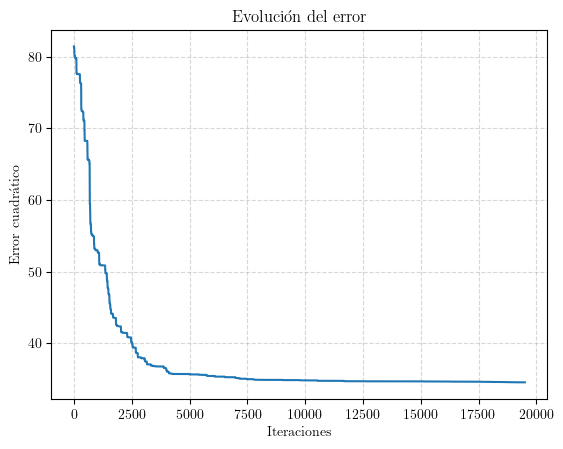

In [23]:
plt.plot(error_array[500:20000])
plt.xlabel("Iteraciones")
plt.ylabel("Error cuadrático")
plt.title("Evolución del error")
plt.grid(linestyle="--",alpha=0.5)
plt.savefig("P1E1.pdf")

### Ajuste final

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18328\2714672375.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels.astype(int))


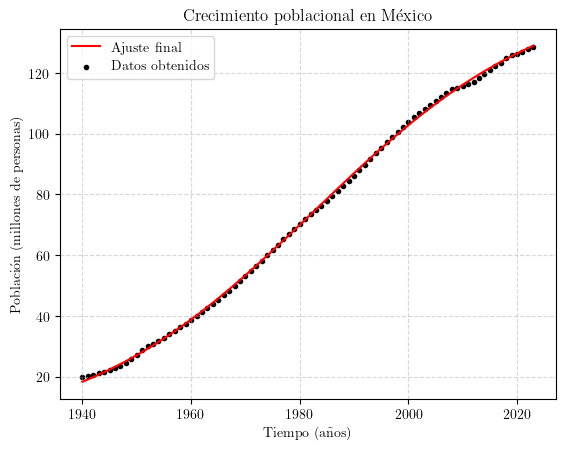

In [48]:
fig,ax=plt.subplots()
plt.plot(time,Logistic(time,x0,a,b),color="red",label="Ajuste final")
plt.scatter(time,data, marker=".",color="black",label="Datos obtenidos")
labels=plt.xticks()[0]+1940
ax.set_xticklabels(labels.astype(int))
plt.grid(linestyle="--",alpha=0.5)
plt.xlabel("Tiempo (años)")
plt.ylabel("Población (millones de personas)")
plt.title("Crecimiento poblacional en México")
plt.legend()
plt.savefig("P1I2.pdf")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18328\1358111837.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels.astype(int))


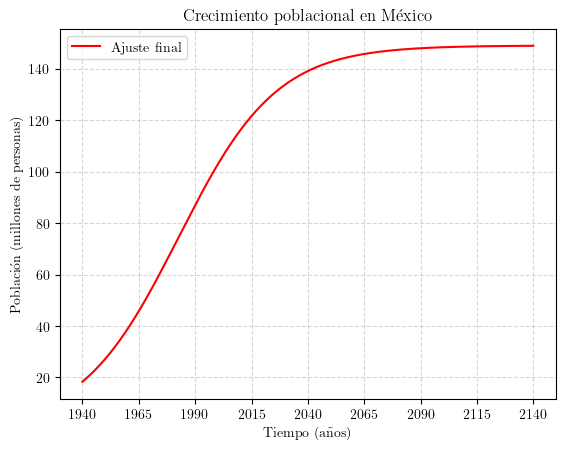

In [51]:
fig,ax=plt.subplots()
time1=np.linspace(0,200,1000)
plt.plot(time1,Logistic(time1,x0,a,b),color="red",label="Ajuste final")
labels=plt.xticks()[0]+1940
ax.set_xticklabels(labels.astype(int))
plt.grid(linestyle="--",alpha=0.5)
plt.xlabel("Tiempo (años)")
plt.ylabel("Población (millones de personas)")
plt.title("Crecimiento poblacional en México")
plt.legend()
plt.savefig("P1I2.pdf")

Para calcular el tiempo en el que  se demora en llegar al valor de saturación, aproximaremos b a 149 millones

In [62]:
lim=new_x[-1]
i=time.size
while np.abs(lim-b)>0.2:
    lim=Logistic(i,x0,a,b)
    i+=1

In [65]:
i+1940,lim

(2128, 148.85289142871673)

# Proyecto 2

In [34]:
df=pd.read_csv("PoblacionVIH_Mexico.dat", delimiter="\t",header=None)
data=torch.tensor(df[1].values)
time=torch.tensor(df[0].values)

In [35]:
def Logistic2(t,x0,a,b):
    return b*x0/(x0+(b-x0)*np.exp(-a*(t-1983)))

In [47]:
cumdata=torch.zeros(data.size(dim=0))
sum=0
for i in range(data.size(dim=0)):
    sum+=data[i]/1000
    cumdata[i]=sum

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

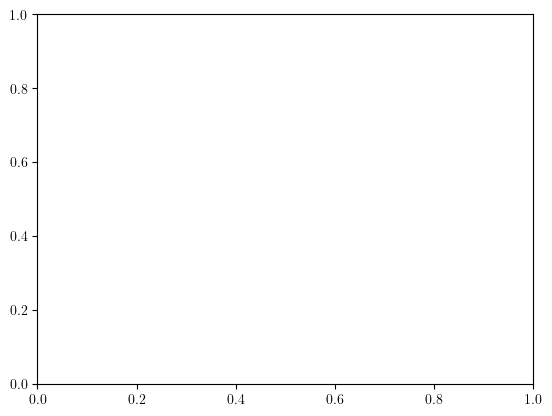

In [49]:
x0i=10
ai=0.15
bi=1000
fig,ax=plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
guess1=Logistic2(time,x0i,ai,bi)
plt.plot(time,guess1,color="red",label="Primera predicción")
plt.plot(time,cumdata,color="black",label="Casos acumulados")
plt.grid(linestyle="--",alpha=0.5)
plt.xlabel("Tiempo (años)")
plt.ylabel("Personas infectadas")
plt.title("Evolución del VIH en México")
plt.legend()
plt.savefig("P2I1.pdf")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7300\1200020093.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels.astype(int))


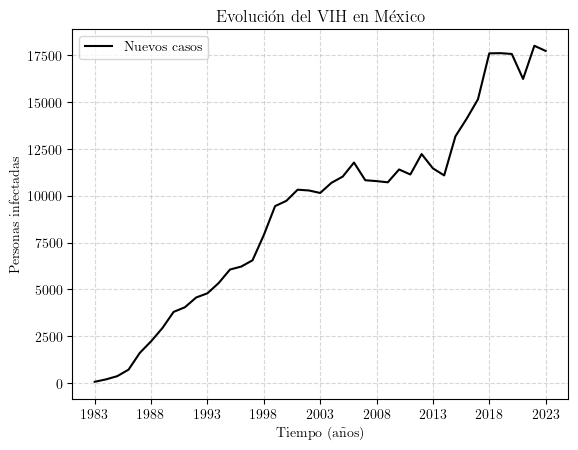

In [9]:
time=np.arange(data.size)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig,ax=plt.subplots()
plt.plot(time,data,color="black",label="Nuevos casos")
plt.grid(linestyle="--",alpha=0.5)
labels=plt.xticks()[0]+1983
ax.set_xticklabels(labels.astype(int))
plt.xlabel("Tiempo (años)")
plt.ylabel("Personas infectadas")
plt.title("Evolución del VIH en México")
plt.legend()
plt.savefig("P2I2.pdf")

In [25]:
n=10**6
sx=0.05
sa=0.001
sb=0.1
error_array=np.zeros(n)
success=0

In [26]:
x0=x0i
a=ai
b=bi
xinitial=guess1
for i in range(n):
    choice=np.random.choice(3)
    err0=error(xinitial,cumdata)
    error_array[i]=err0
    if choice==0:
        delta_x = np.random.normal(0,sx)     
        new_x=Logistic2(time,x0+delta_x,a,b)
        err1=error(new_x,cumdata)
        if err0>err1:
            xinitial=new_x
            x0+=delta_x
            err0=err1
            success+=1
    if choice==1:
        delta_a = np.random.normal(0,sa)
        new_x=Logistic2(time,x0,a+delta_a,b)
        err1=error(new_x,cumdata)
        if err0>err1:
            xinitial=new_x
            a+=delta_a
            err0=err1
            success+=1
    if choice==2:
        delta_b = np.random.normal(0,sb)
        new_x=Logistic2(time,x0,a,b+delta_b)
        err1=error(new_x,cumdata)
        if err0>err1:
            xinitial=new_x
            b+=delta_b
            err0=err1
            success+=1

### Evolución del error

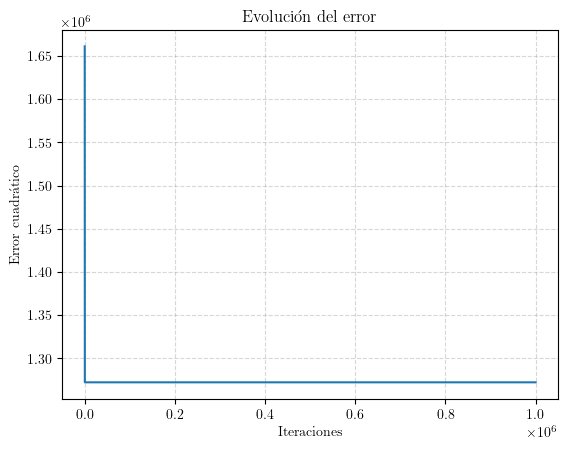

In [13]:
plt.plot(error_array)
plt.xlabel("Iteraciones")
plt.ylabel("Error cuadrático")
plt.title("Evolución del error")
plt.grid(linestyle="--",alpha=0.5)
plt.savefig("P2E1.pdf")

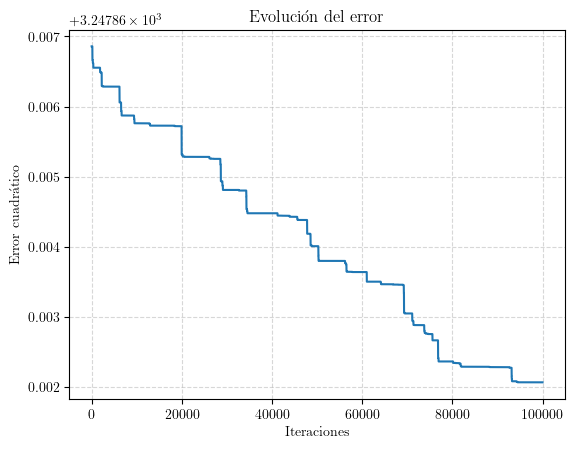

In [108]:
plt.plot(error_array[400000:])
plt.xlabel("Iteraciones")
plt.ylabel("Error cuadrático")
plt.title("Evolución del error")
plt.grid(linestyle="--",alpha=0.5)
plt.savefig("P2E1.pdf")

In [109]:
error_array[-1]

3247.8620716017576

In [21]:
x0,a,b

(10, 0.15, 999.9478744924354)

### Ajuste final

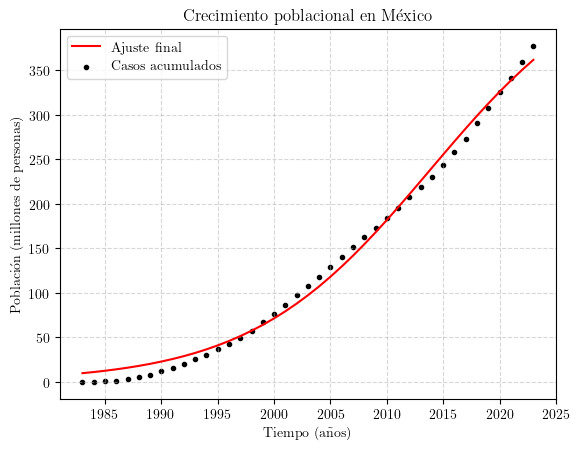

In [28]:
fig,ax=plt.subplots()
plt.plot(time,Logistic2(time,x0,a,b),color="red",label="Ajuste final")
plt.scatter(time,cumdata,color="black", marker='.',label="Casos acumulados")
plt.grid(linestyle="--",alpha=0.5)
plt.xlabel("Tiempo (años)")
plt.ylabel("Población (millones de personas)")
plt.title("Crecimiento poblacional en México")
plt.legend()
plt.savefig("P2I2.pdf")

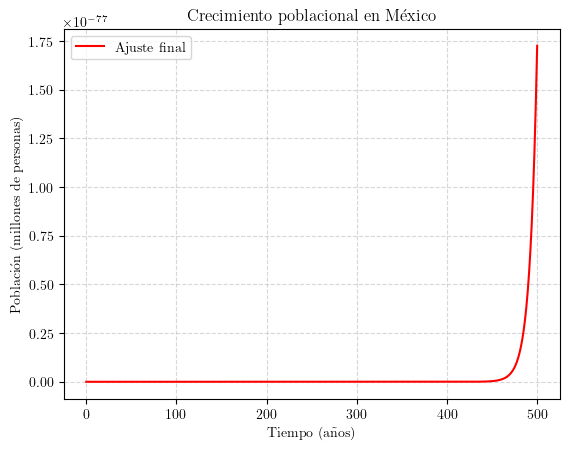

In [59]:
fig,ax=plt.subplots()
time1=np.linspace(0,500,1000)
plt.plot(time1,Logistic2(time1,x0,a,b),color="red",label="Ajuste final")
plt.grid(linestyle="--",alpha=0.5)
plt.xlabel("Tiempo (años)")
plt.ylabel("Población (millones de personas)")
plt.title("Crecimiento poblacional en México")
plt.legend()
plt.savefig("P2I2.pdf")